<a href="https://colab.research.google.com/github/avanegasp/unicatalu-a/blob/gh-pages/Practica_individual_Ucatalu%C3%B1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette="viridis")
import matplotlib.patches as patches


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ahora cambio los tipos que tenía como 'object' a 'Category'

In [3]:
archivo_path = '/content/drive/MyDrive/mi_proyecto_unicataluña/Fortune_500/Fortune500.csv'
dtype = { 'name': 'category',
                       'industry': 'category',
                        'sector': 'category',
                        'headquarters_state': 'category',
                        'headquarters_city': 'category',
                        'global_500': 'category',
                        'newcomer_to_fortune_500': 'category',
                        'female_ceo': 'category',
                        'founder_is_ceo': 'category',

              }
archivo_path

'/content/drive/MyDrive/mi_proyecto_unicataluña/Fortune_500/Fortune500.csv'

In [4]:
df_fortune = pd.read_csv(archivo_path, dtype=dtype)

In [5]:
df_fortune.describe()


,rank,year,market_value_mil,revenue_mil,profit_mil,asset_mil,employees
count,13940.000000,13940.000000,5.185000e+03,13940.000000,5497.000000,5.500000e+03,4.500000e+03
mean,250.511765,2009.537231,4.738633e+04,20225.158016,2501.271621,8.583805e+04,5.736614e+04
std,144.368022,8.071421,1.245715e+05,35994.023496,5626.509092,2.974978e+05,1.281823e+05
min,1.000000,1996.000000,5.610000e+00,48.290000,-12650.000000,2.450000e+01,5.200000e+01
25%,125.000000,2003.000000,5.637000e+03,5806.225000,390.000000,7.653750e+03,1.182075e+04
50%,250.500000,2010.000000,1.583500e+04,9587.500000,948.000000,1.906700e+04,2.533200e+04
75%,375.250000,2017.000000,4.269900e+04,19109.000000,2319.000000,5.134875e+04,5.800000e+04
max,500.000000,2023.000000,2.849538e+06,611289.000000,99803.000000,4.305288e+06,2.300000e+06


In [ ]:
df_fortune.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13940 entries, 0 to 13939
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   name                     13940 non-null  category
 1   rank                     13940 non-null  int64   
 2   year                     13940 non-null  int64   
 3   industry                 13940 non-null  category
 4   sector                   4500 non-null   category
 5   headquarters_state       13940 non-null  category
 6   headquarters_city        7495 non-null   category
 7   market_value_mil         5185 non-null   float64 
 8   revenue_mil              13940 non-null  float64 
 9   profit_mil               5497 non-null   float64 
 10  asset_mil                5500 non-null   float64 
 11  employees                4500 non-null   float64 
 12  founder_is_ceo           4500 non-null   category
 13  female_ceo               4500 non-null   category
 14  newcom

In [6]:
df_fortune.shape

(13940, 16)

In [7]:
df_fortune.isnull().mean()

name                       0.000000
rank                       0.000000
year                       0.000000
industry                   0.000000
sector                     0.677188
headquarters_state         0.000000
headquarters_city          0.462339
market_value_mil           0.628049
revenue_mil                0.000000
profit_mil                 0.605667
asset_mil                  0.605452
employees                  0.677188
founder_is_ceo             0.677188
female_ceo                 0.677188
newcomer_to_fortune_500    0.677188
global_500                 0.713056
dtype: float64

Elimina las celdas null del dataset original

In [8]:
df_fortune.dropna(inplace=True)

In [9]:
df_fortune.shape

(3778, 16)

In [10]:
df_fortune.head(10)

,name,rank,year,industry,sector,headquarters_state,headquarters_city,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
9940,Walmart,1,2016,General Merchandisers,Retailing,AR,Bentonville,215356.0,482130.0,14694.0,199581.0,2300000.0,no,no,no,yes
9941,Exxon Mobil,2,2016,Petroleum Refining,Energy,TX,Irving,347129.0,246204.0,16150.0,336758.0,75600.0,no,no,no,yes
9942,Apple,3,2016,"Computers, Office Equipment",Technology,CA,Cupertino,604304.0,233715.0,53394.0,290479.0,110000.0,no,no,no,yes
9943,Berkshire Hathaway,4,2016,Insurance: Property and Casualty (Stock),Financials,NE,Omaha,350279.0,210821.0,24083.0,552257.0,331000.0,no,no,no,yes
9944,McKesson,5,2016,Wholesalers: Health Care,Health Care,CA,San Francisco,35945.0,181241.0,1476.0,53870.0,70400.0,no,no,no,yes
9945,UnitedHealth Group,6,2016,Health Care: Insurance and Managed Care,Health Care,MN,Minnetonka,122542.0,157107.0,5813.0,111383.0,200000.0,no,no,no,yes
9946,CVS Health,7,2016,Food & Drug Stores,Food & Drug Stores,RI,Woonsocket,113947.0,153290.0,5237.0,93657.0,199000.0,no,no,no,yes
9947,General Motors,8,2016,Motor Vehicles & Parts,Motor Vehicles & Parts,MI,Detroit,48543.0,152356.0,9687.0,194520.0,215000.0,no,yes,no,yes
9948,Ford Motor,9,2016,Motor Vehicles & Parts,Motor Vehicles & Parts,MI,Dearborn,53758.0,149558.0,7373.0,224925.0,199000.0,no,no,no,yes
9949,AT&T,10,2016,Telecommunications,Telecommunications,TX,Dallas,240943.0,146801.0,13345.0,402672.0,281450.0,no,no,no,yes


In [ ]:
df_fortune.sample(5)

,name,rank,year,industry,sector,headquarters_state,headquarters_city,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
10123,Icahn Enterprises,184,2016,Diversified Financials,Financials,NY,New York,8290.0,15272.0,1194.0,36442.0,73807.0,no,no,no,no
11341,JetBlue Airways,402,2018,Airlines,Transportation,NY,Long Island City,6540.0,7015.0,1147.0,9781.0,17424.0,no,no,no,no
13730,Tractor Supply,291,2023,Specialty Retailers: Other,Retailing,TN,Brentwood,25830.0,14205.0,1089.0,8490.0,36500.0,no,no,no,no
12156,Truist Financial,217,2020,Commercial Banks,Financials,NC,Charlotte,41480.0,14664.0,3224.0,473078.0,59000.0,no,no,no,no
12440,Walmart,1,2021,General Merchandisers,Retailing,AR,Bentonville,382643.0,559151.0,13510.0,252496.0,2300000.0,no,no,no,yes


In [ ]:
df_fortune['headquarters_state']

9940     AR
9941     TX
9942     CA
9943     NE
9944     CA
         ..
13935    NY
13936    CA
13937    SC
13938    CA
13939    CA
Name: headquarters_state, Length: 3778, dtype: category
Categories (45, object): ['AL', 'AR', 'AZ', 'CA', ..., 'UT', 'VA', 'WA', 'WI']

In [ ]:
df_fortune.describe()

,rank,year,market_value_mil,revenue_mil,profit_mil,asset_mil,employees
count,3778.000000,3778.000000,3.778000e+03,3778.000000,3778.000000,3.778000e+03,3.778000e+03
mean,251.330334,2019.511382,5.394982e+04,28484.638433,2825.161196,9.170578e+04,5.949055e+04
std,144.466095,2.291563,1.410236e+05,48000.556772,6084.011649,3.162779e+05,1.324389e+05
min,1.000000,2016.000000,1.000000e+01,5130.000000,0.000000,3.260000e+02,5.200000e+01
25%,130.000000,2018.000000,7.527000e+03,8225.000000,447.000000,9.788750e+03,1.268525e+04
50%,250.500000,2020.000000,1.876400e+04,12887.500000,1091.500000,2.183600e+04,2.641200e+04
75%,377.000000,2022.000000,4.790300e+04,24113.250000,2620.750000,5.569800e+04,6.000000e+04
max,500.000000,2023.000000,2.849538e+06,611289.000000,99803.000000,4.305288e+06,2.300000e+06


Las variables (market_value_mil	revenue_mil	profit_mil	asset_mil) son continuas (porque ellas dependen entre todas)
La variable employees es discreta

In [ ]:
df_fortune['employees'] = df_fortune['employees'] * 1e6 #Solo si quiero retirar los ceros

In [ ]:
df_fortune.describe(include='category')

,name,industry,sector,headquarters_state,headquarters_city,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
count,3778,3778,3778,3778,3778,3778,3778,3778,3778
unique,700,72,21,39,288,2,2,2,2
top,NCR,Utilities: Gas and Electric,Financials,NY,New York,no,no,no,no
freq,8,179,551,406,332,3642,3508,3569,2880


In [ ]:
df_fortune.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3778 entries, 9940 to 13939
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   name                     3778 non-null   category
 1   rank                     3778 non-null   int64   
 2   year                     3778 non-null   int64   
 3   industry                 3778 non-null   category
 4   sector                   3778 non-null   category
 5   headquarters_state       3778 non-null   category
 6   headquarters_city        3778 non-null   category
 7   market_value_mil         3778 non-null   float64 
 8   revenue_mil              3778 non-null   float64 
 9   profit_mil               3778 non-null   float64 
 10  asset_mil                3778 non-null   float64 
 11  employees                3778 non-null   float64 
 12  founder_is_ceo           3778 non-null   category
 13  female_ceo               3778 non-null   category
 14  newc

In [ ]:
df_fortune.nunique()

name                        700
rank                        500
year                          8
industry                     72
sector                       21
headquarters_state           39
headquarters_city           288
market_value_mil           3648
revenue_mil                3497
profit_mil                 2447
asset_mil                  3683
employees                  2123
founder_is_ceo                2
female_ceo                    2
newcomer_to_fortune_500       2
global_500                    2
dtype: int64

In [ ]:
df_fortune['name'].nunique()

700

### Matriz de correlación en variables númericas

para ver cuáles son las variables más correlacionadas


---



In [ ]:
corrmat = df_fortune.corr()

<ipython-input-15-7436ef5974f2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_fortune.corr()


In [ ]:
corrmat

,rank,year,market_value_mil,revenue_mil,profit_mil,asset_mil,employees
rank,1.000000,0.001974,-0.351967,-0.588046,-0.426274,-0.291968,-0.356982
year,0.001974,1.000000,0.093217,0.076956,0.092131,0.036959,0.012232
market_value_mil,-0.351967,0.093217,1.000000,0.563012,0.801320,0.190122,0.322037
revenue_mil,-0.588046,0.076956,0.563012,1.000000,0.602627,0.303929,0.709513
profit_mil,-0.426274,0.092131,0.801320,0.602627,1.000000,0.428422,0.274774
asset_mil,-0.291968,0.036959,0.190122,0.303929,0.428422,1.000000,0.133849
employees,-0.356982,0.012232,0.322037,0.709513,0.274774,0.133849,1.000000


<Axes: >

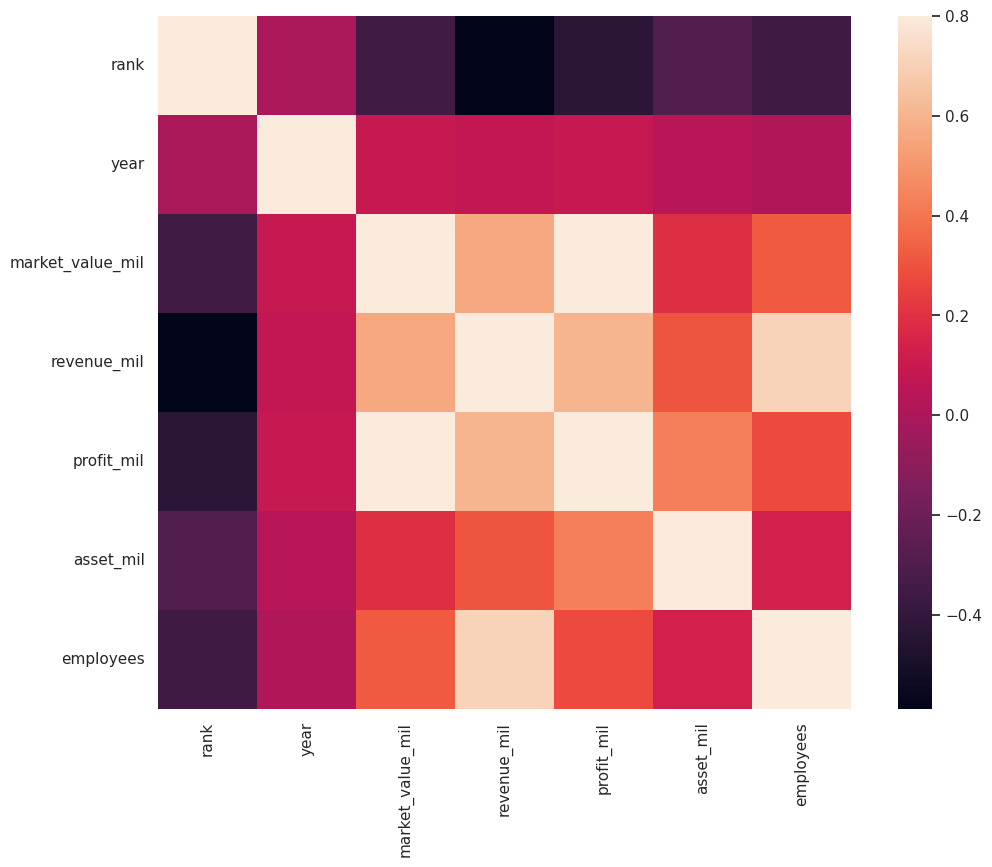

In [ ]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax= 0.8, square= True)

### Matriz de correlación con números


In [ ]:
k=10

In [ ]:
cols = corrmat.nlargest(k, 'revenue_mil')['revenue_mil'].index

In [ ]:
cols

Index(['revenue_mil', 'employees', 'profit_mil', 'market_value_mil',
       'asset_mil', 'year', 'rank'],
      dtype='object')

In [ ]:
cm = np.corrcoef(df_fortune[cols].values.T)
cm

array([[ 1.        ,  0.70951349,  0.60262739,  0.56301183,  0.30392903,
         0.07695607, -0.58804649],
       [ 0.70951349,  1.        ,  0.27477435,  0.32203713,  0.13384905,
         0.01223218, -0.35698203],
       [ 0.60262739,  0.27477435,  1.        ,  0.8013196 ,  0.42842193,
         0.09213115, -0.42627432],
       [ 0.56301183,  0.32203713,  0.8013196 ,  1.        ,  0.19012203,
         0.09321695, -0.35196723],
       [ 0.30392903,  0.13384905,  0.42842193,  0.19012203,  1.        ,
         0.03695868, -0.29196838],
       [ 0.07695607,  0.01223218,  0.09213115,  0.09321695,  0.03695868,
         1.        ,  0.00197442],
       [-0.58804649, -0.35698203, -0.42627432, -0.35196723, -0.29196838,
         0.00197442,  1.        ]])

In [ ]:
sns.set(font_scale=1.25)

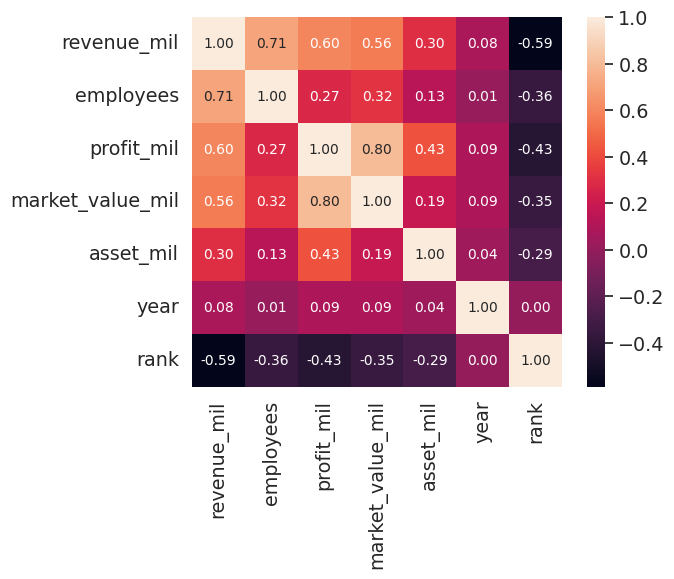

In [ ]:
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)

Analísis univariado

### Númericas

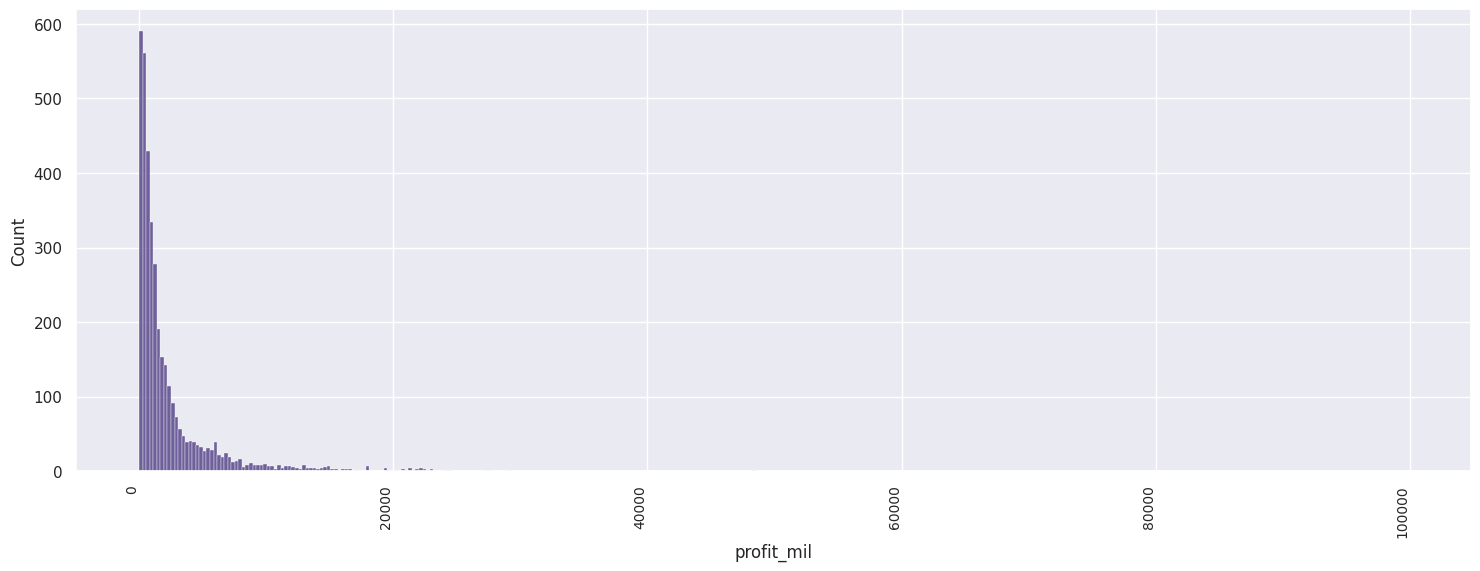

In [ ]:
plt.figure(figsize=(18, 6)) #(ancho,altura) en pulgadas
plt.xticks(rotation=90, ha='right', fontsize=10)
sns.histplot(data = df_fortune, x='profit_mil')
plt.show()

#### Market_value

(array([3.674e+03, 6.700e+01, 1.800e+01, 7.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00]),
 array([1.0000000e+01, 2.8496280e+05, 5.6991560e+05, 8.5486840e+05,
        1.1398212e+06, 1.4247740e+06, 1.7097268e+06, 1.9946796e+06,
        2.2796324e+06, 2.5645852e+06, 2.8495380e+06]),
 <BarContainer object of 10 artists>)

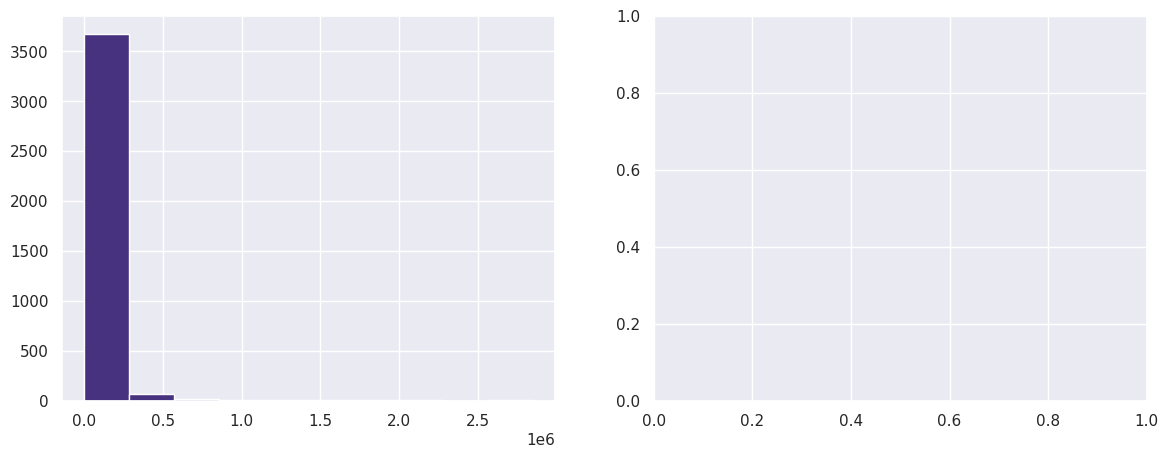

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (14,5))
#plt.hist(df_fortune['revenue_mil'])
ax[0].hist(df_fortune['market_value_mil']) #ax[0] me lo coloca a la izq


<Axes: xlabel='market_value_mil'>

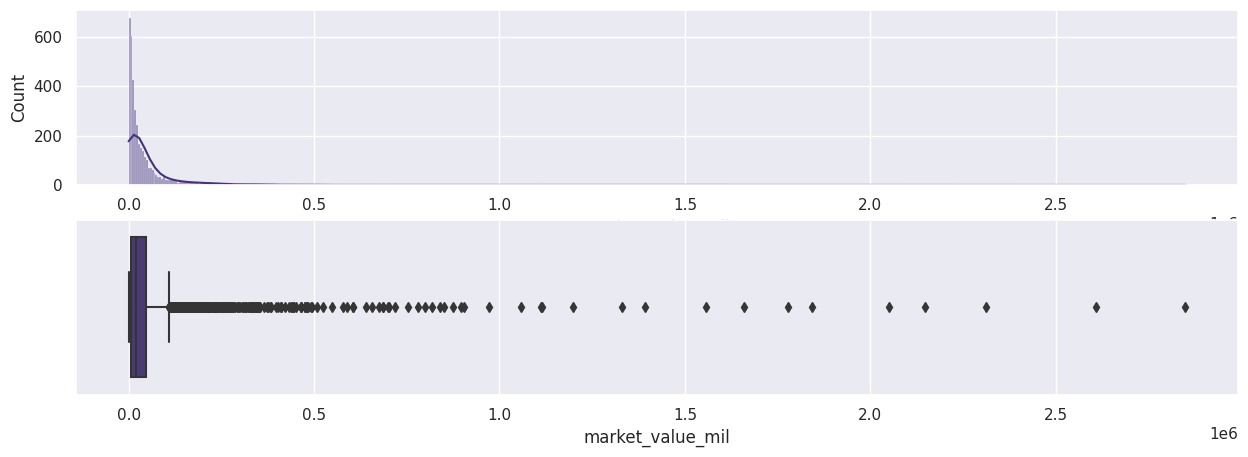

In [ ]:
fig, ax = plt.subplots(2,1,figsize = (15,5))

sns.histplot(data = df_fortune, x='market_value_mil', kde=True, ax=ax[0])
#plt.figure(figsize=(18, 10)) #(ancho,altura) en pulgadas
#plt.xticks(rotation=90, ha='right', fontsize=10)


sns.boxplot(data = df_fortune, x='market_value_mil')

Datos atípicos mayores a 500000 dolares, son 40 en total

In [ ]:
df_filtered = df_fortune[df_fortune['market_value_mil'] > 500000]
df_filtered.sample(3)

,name,rank,year,industry,sector,headquarters_state,headquarters_city,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
13489,Tesla,50,2023,Motor Vehicles & Parts,Motor Vehicles & Parts,TX,Austin,656425.0,81462.0,12556.0,82338.0,127855.0,yes,no,no,yes
11941,Amazon,2,2020,Internet Services and Retailing,Retailing,WA,Seattle,970680.0,280522.0,11588.0,225248.0,798000.0,yes,no,no,yes
9942,Apple,3,2016,"Computers, Office Equipment",Technology,CA,Cupertino,604304.0,233715.0,53394.0,290479.0,110000.0,no,no,no,yes


Solo 40 casas tienen un valor atípico

In [ ]:
df_filtered = df_fortune[df_fortune['market_value_mil'] > 500000].count()
df_filtered

name                       40
rank                       40
year                       40
industry                   40
sector                     40
headquarters_state         40
headquarters_city          40
market_value_mil           40
revenue_mil                40
profit_mil                 40
asset_mil                  40
employees                  40
founder_is_ceo             40
female_ceo                 40
newcomer_to_fortune_500    40
global_500                 40
dtype: int64

In [ ]:
union = df_filtered[['market_value_mil', 'profit_mil']]
union.head(5)

,market_value_mil,profit_mil
9942,604304.0,53394.0
9975,525119.0,16348.0
10442,753718.0,45687.0
10466,579426.0,19478.0
10467,508935.0,16798.0


In [ ]:
var = 'market_value_mil'

In [ ]:
from pandas.core.internals import concat
data = pd.concat([df_fortune['profit_mil'],df_fortune[var]],axis=1)
data.head(5)

,profit_mil,market_value_mil
9940,14694.0,215356.0
9941,16150.0,347129.0
9942,53394.0,604304.0
9943,24083.0,350279.0
9944,1476.0,35945.0


In [ ]:
var

'market_value_mil'

<Axes: xlabel='profit_mil', ylabel='market_value_mil'>

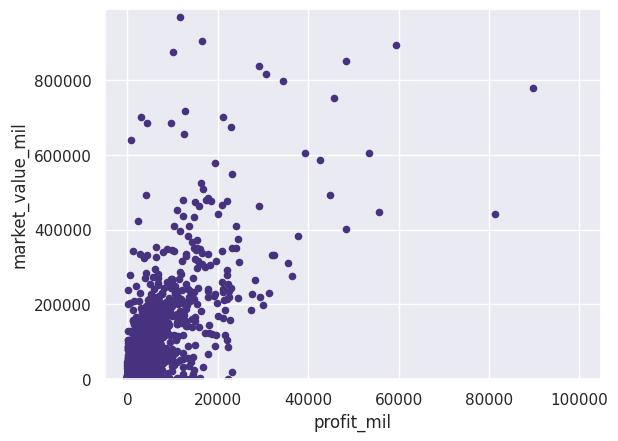

In [ ]:
data.plot.scatter(x='profit_mil', y=var,ylim=(0,990000))

Las empresas que están 'raras' son aquellas cuyas ganancias son menos de 100000 USD y que tienen ventas

### Profit_mil


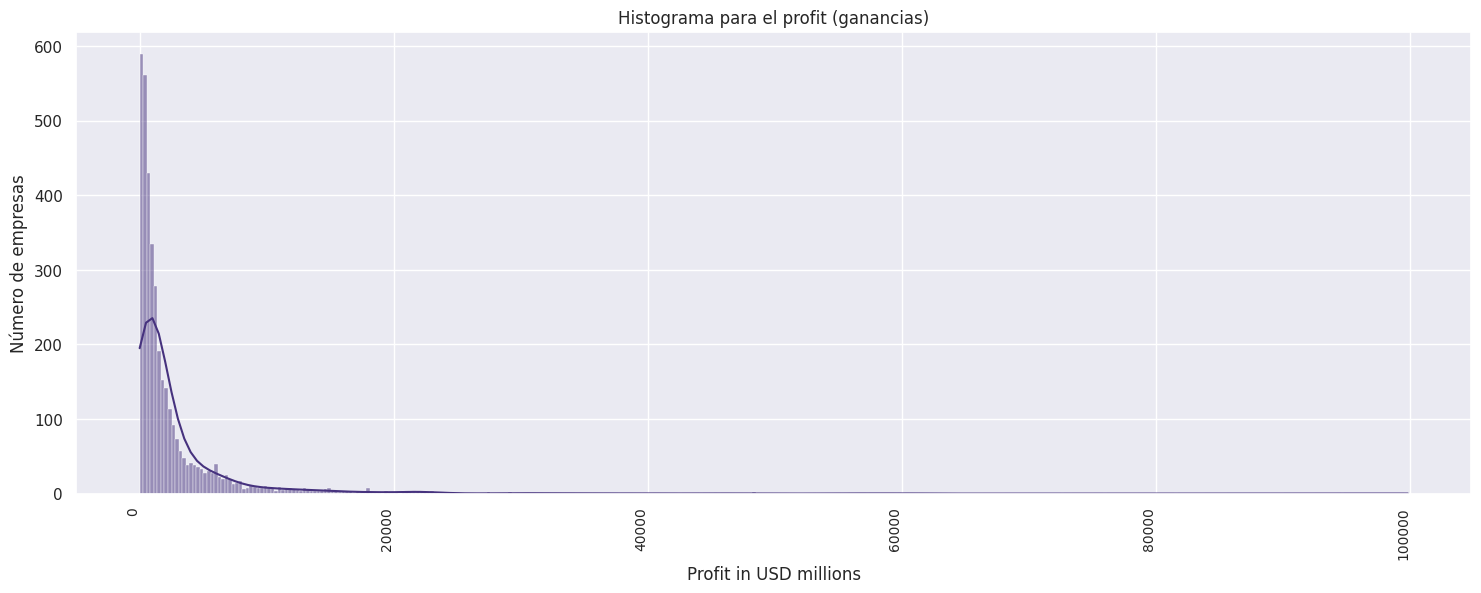

In [ ]:
plt.figure(figsize=(18, 6)) #(ancho,altura) en pulgadas
plt.xticks(rotation=90, ha='right', fontsize=10)
sns.histplot(data = df_fortune, x='profit_mil', kde=True) #kde = kernel distribution estimated (suaviza un poco el histo)
plt.title('Histograma para el profit (ganancias)')
plt.xlabel('Profit in USD millions')
plt.ylabel('Número de empresas')
plt.show()

Hay una distribucion con cola hacia la derecha, asimetria de tipo postiva, sesgo positivo
Una moda de 600 empresas entre el cuartil 25 y 75 de mis datos ( está el 50% de los datos)
Hay empresas que no ganan nada (OMG)

### Revenue_mil

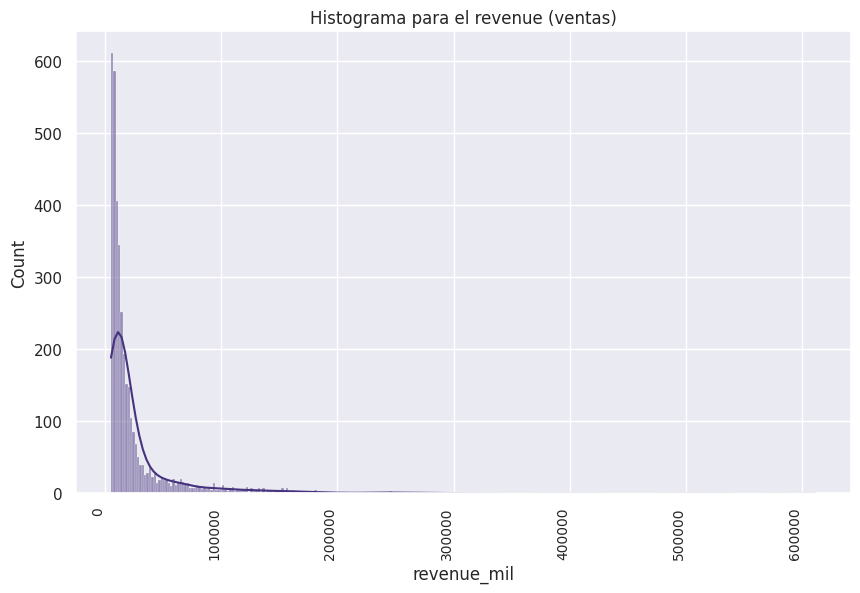

In [ ]:
plt.figure(figsize=(10, 6)) #(ancho,altura) en pulgadas
plt.xticks(rotation=90, ha='right', fontsize=10)
sns.histplot(data = df_fortune, x='revenue_mil', kde = True)
plt.title('Histograma para el revenue (ventas)')
plt.show()

Compportamiento similar al de 'profit_mil', en esta más de 600 empresas tienen ventas 10000 millones
Con cola hacía la derecha, asímetría positiva
Hay empresas cuyas ganancias son muyyy pocas

### Profit vs employees

In [ ]:
union_employees = df_fortune[['profit_mil', 'employees']]
union_employees.sample(5)

,profit_mil,employees
10956,1907.0,449000.0
10644,1553.0,260200.0
9961,2476.0,25900.0
13037,6828.0,28800.0
10706,4059.0,11900.0


In [ ]:
var_employees= 'employees'

In [ ]:
data_employees = pd.concat([df_fortune['revenue_mil'],df_fortune[var_employees]],axis=1)
data_employees.head(5)

,revenue_mil,employees
9940,482130.0,2300000.0
9941,246204.0,75600.0
9942,233715.0,110000.0
9943,210821.0,331000.0
9944,181241.0,70400.0


In [ ]:
var_employees

'employees'

<Axes: xlabel='revenue_mil', ylabel='employees'>

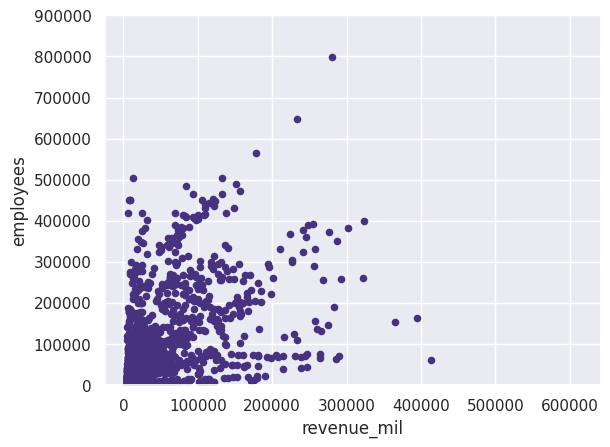

In [ ]:
data_employees.plot.scatter(x='revenue_mil', y=var_employees,ylim=(0,900000))

# Categóricas / cualitativas



##Female_ceo


In [ ]:
df_fortune['female_ceo'].value_counts()

no     3508
yes     270
Name: female_ceo, dtype: int64

<Axes: xlabel='female_ceo', ylabel='count'>

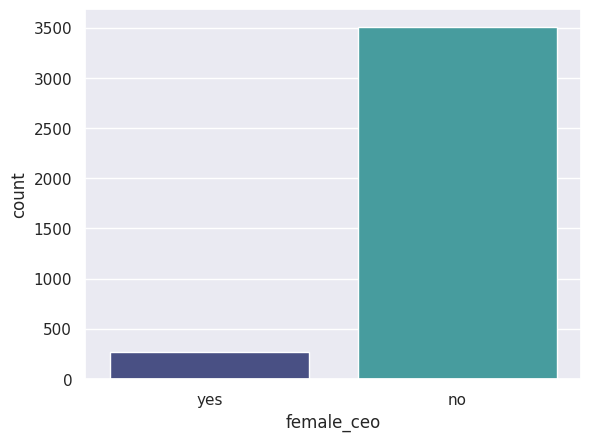

In [ ]:
sns.countplot(data = df_fortune, x='female_ceo', order=['yes','no'], palette='mako')

In [ ]:
df_fortune['founder_is_ceo'].value_counts()

no     3642
yes     136
Name: founder_is_ceo, dtype: int64

<Axes: xlabel='founder_is_ceo', ylabel='count'>

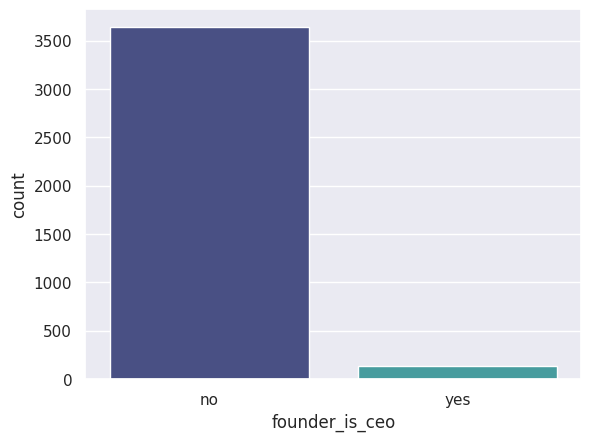

In [ ]:
sns.countplot(data = df_fortune, x='founder_is_ceo', palette='mako')

In [ ]:
df_fortune['newcomer_to_fortune_500'].value_counts()

no     3569
yes     209
Name: newcomer_to_fortune_500, dtype: int64

<Axes: xlabel='newcomer_to_fortune_500', ylabel='count'>

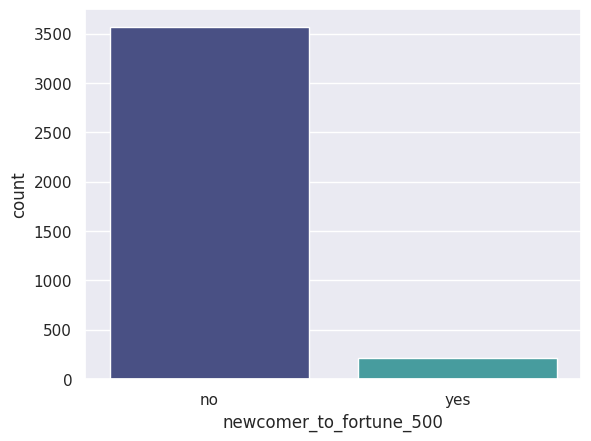

In [ ]:
sns.countplot(data=df_fortune, x='newcomer_to_fortune_500',palette='mako')

In [ ]:
df_fortune['global_500'].value_counts()

no     2880
yes     898
Name: global_500, dtype: int64

Tenemos casi 900 empresas que están en el ranking de US pero NO en el Globla.

<Axes: xlabel='global_500', ylabel='count'>

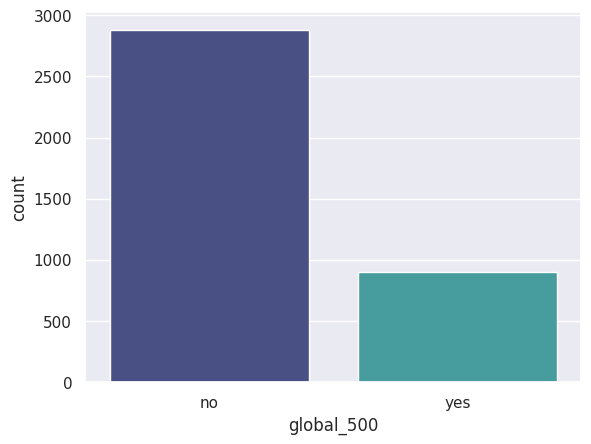

In [ ]:
sns.countplot(data=df_fortune, x='global_500', palette='mako')

### headquarters_state

los 4 primeros estados que tienen más empresas son NY,CA,TX,  
IL

In [ ]:
var_hqs = df_fortune['headquarters_state'].value_counts()
var_hqs.head(4)

NY    406
CA    399
TX    390
IL    281
Name: headquarters_state, dtype: int64

<Axes: xlabel='headquarters_state', ylabel='count'>

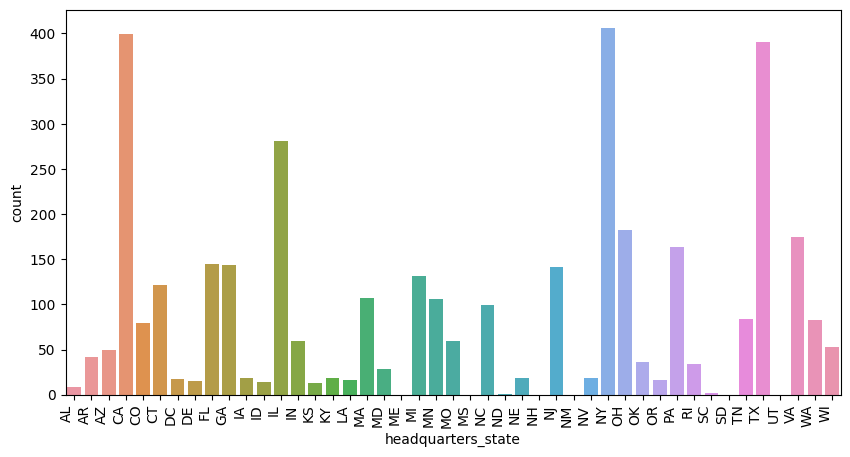

In [ ]:
plt.figure(figsize=(10, 5)) #(ancho,altura) en pulgadas
plt.xticks(rotation=90, ha='right', fontsize=10)
sns.countplot(data=df_fortune, x='headquarters_state')

In [ ]:
(df_fortune['sector'].value_counts(normalize = True)*100)

Financials                       14.584436
Energy                           12.466914
Retailing                         9.872949
Technology                        9.237692
Health Care                       8.681842
Food, Beverages & Tobacco         4.817364
Wholesalers                       4.526204
Materials                         4.155638
Business Services                 4.049762
Transportation                    3.705664
Industrials                       3.705664
Chemicals                         2.938062
Engineering & Construction        2.408682
Household Products                2.355744
Motor Vehicles & Parts            2.276337
Aerospace & Defense               2.196930
Media                             2.143992
Hotels, Restaurants & Leisure     2.038115
Telecommunications                1.826363
Apparel                           1.111699
Food & Drug Stores                0.899947
Name: sector, dtype: float64

El sector de finanzas (15%) y energía (14%) son los que más puntajes tienen, dejando a la tecnología en un 4 lugar con un 9%

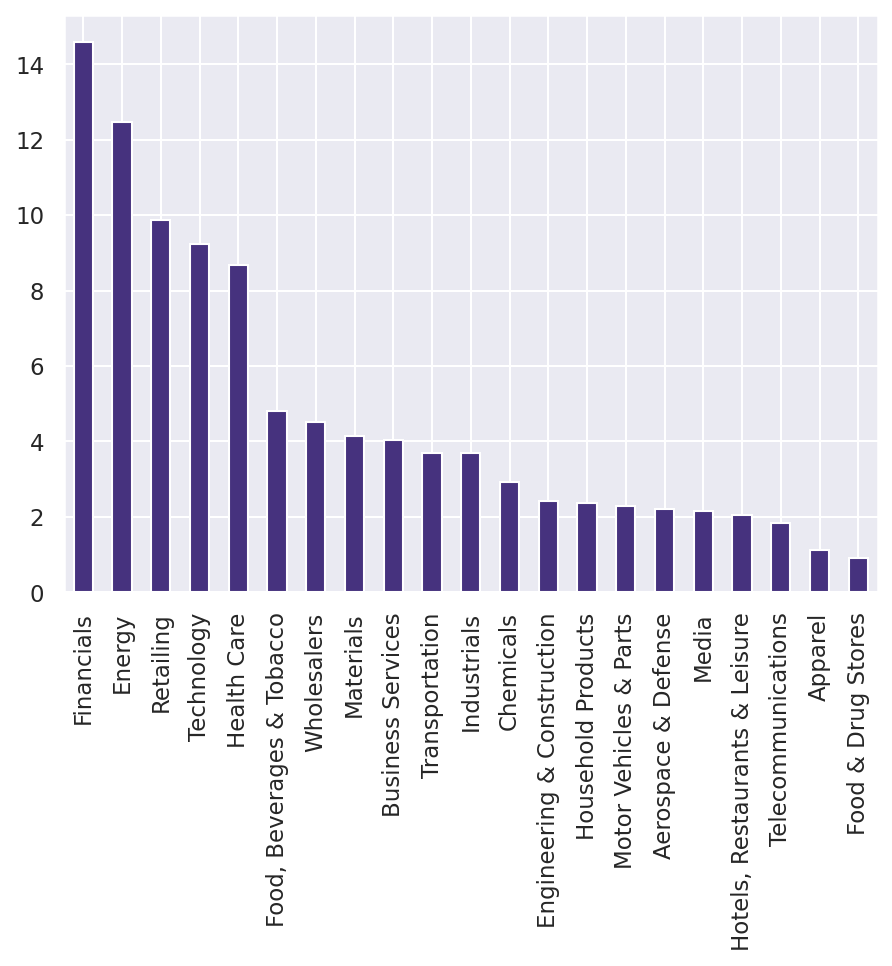

In [ ]:
fig = plt.figure(figsize=(7,5), dpi=150)
(df_fortune['sector'].value_counts(normalize = True)*100).plot(kind = 'bar')
plt.show()

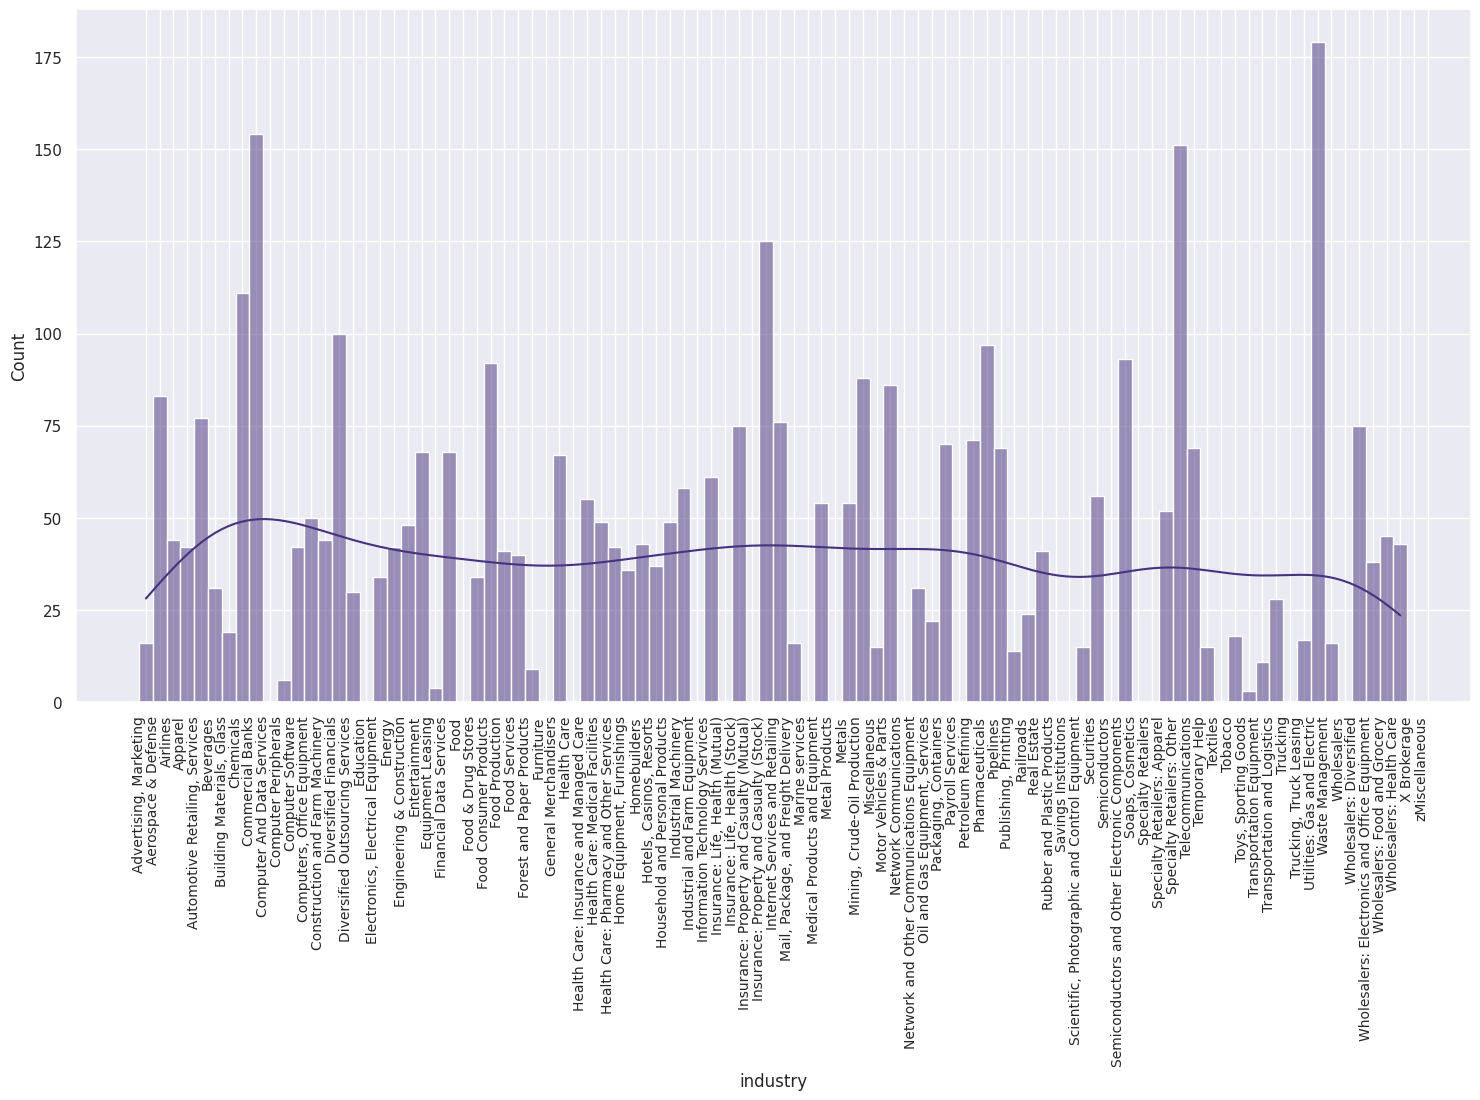

In [ ]:
plt.figure(figsize=(18, 9)) #(ancho,altura) en pulgadas
plt.xticks(rotation=90, ha='right', fontsize=10)
sns.histplot(data = df_fortune, x = 'industry', kde=True)
plt.show()

In [ ]:
(df_fortune['industry'].value_counts(normalize = True)*100)

Utilities: Gas and Electric                 4.737957
Commercial Banks                            4.076231
Specialty Retailers: Other                  3.996824
Insurance: Property and Casualty (Stock)    3.308629
Chemicals                                   2.938062
                                              ...   
Semiconductors                              0.000000
Savings Institutions                        0.000000
Rubber and Plastic Products                 0.000000
Network Communications                      0.000000
zMiscellaneous                              0.000000
Name: industry, Length: 94, dtype: float64

la industria del gas es la que más porcentaje tiene con un 5%, seguida de los bancos con un 4%, computer software tiene un 1%

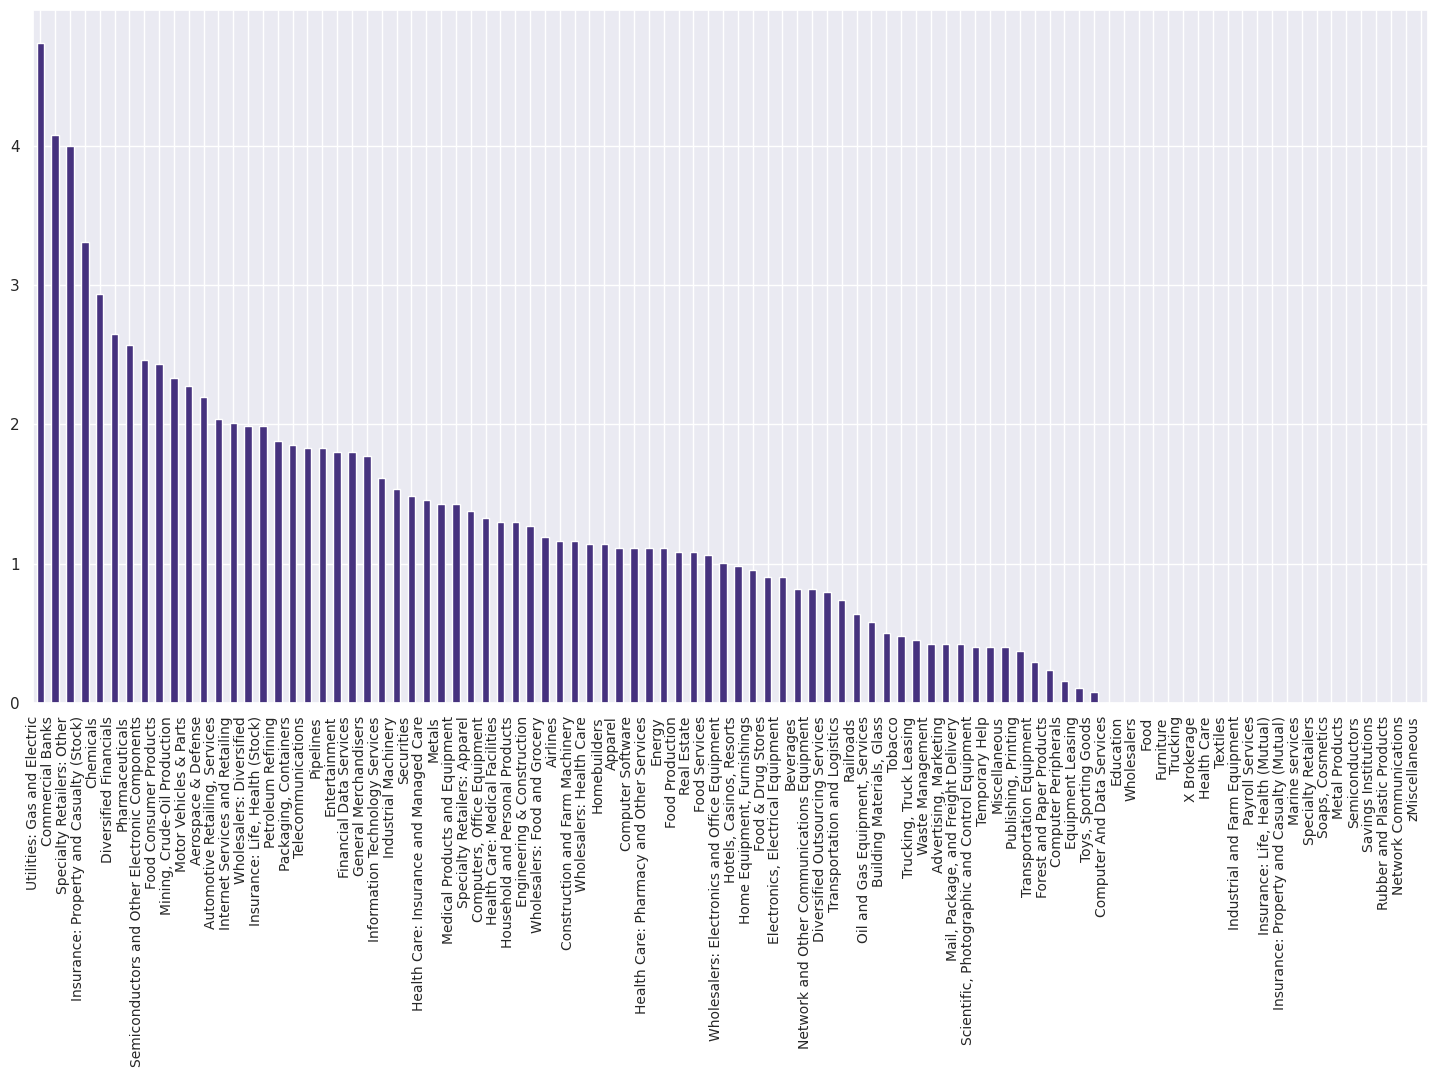

In [ ]:
plt.figure(figsize=(18, 9)) #(ancho,altura) en pulgadas
plt.xticks(rotation=90, ha='right', fontsize=10)
(df_fortune['industry'].value_counts(normalize = True)*100).plot(kind = 'bar')
plt.show()

In [ ]:
(df_fortune['name'].value_counts(normalize = True)*100)

NCR                            0.211752
Baxter International           0.211752
Occidental Petroleum           0.211752
Berkshire Hathaway             0.211752
EOG Resources                  0.211752
                                 ...   
Georgia-Pacific Corporation    0.000000
Genzyme Corporation            0.000000
Genworth Financial, Inc.       0.000000
Genworth Financial , Inc.      0.000000
TruServ Corporation           0.000000
Name: name, Length: 2255, dtype: float64

### Rank vs name
queda pendiente cuántas veces las 20 primeras empresas ('name') han estado en el rank

In [ ]:
(df_fortune['name'].value_counts(normalize = True)*100)

NCR                            0.211752
Baxter International           0.211752
Occidental Petroleum           0.211752
Berkshire Hathaway             0.211752
EOG Resources                  0.211752
                                 ...   
Georgia-Pacific Corporation    0.000000
Genzyme Corporation            0.000000
Genworth Financial, Inc.       0.000000
Genworth Financial , Inc.      0.000000
TruServ Corporation           0.000000
Name: name, Length: 2255, dtype: float64

In [ ]:
# Calcular la cuenta de ocurrencias de cada nombre
name_counts = df_fortune['name'].value_counts()
name_counts

NCR                            8
Baxter International           8
Occidental Petroleum           8
Berkshire Hathaway             8
EOG Resources                  8
                              ..
Georgia-Pacific Corporation    0
Genzyme Corporation            0
Genworth Financial, Inc.       0
Genworth Financial , Inc.      0
TruServ Corporation           0
Name: name, Length: 2255, dtype: int64

In [ ]:
# Seleccionar los 20 nombres más comunes
top_names = name_counts.head(20)
top_names.count()

20

In [ ]:
var_name= top_names
var_name.head(15)

NCR                              8
Baxter International             8
Occidental Petroleum             8
Berkshire Hathaway               8
EOG Resources                    8
Huntsman                         8
Eastman Chemical                 8
Bed Bath & Beyond                8
Becton Dickinson                 8
Huntington Ingalls Industries    8
Humana                           8
Ecolab                           8
Best Buy                         8
Union Pacific                    8
Edison International             8
Name: name, dtype: int64

In [ ]:
union_rank_name = df_fortune[['rank', 'name']]
union_rank_name.sample(5)

,rank,name
10099,160,Supervalu
13922,483,Regions Financial
13770,331,Alcoa
12460,21,Ford Motor
12272,333,Equitable Holdings


In [ ]:
rank_counts = df_fortune['rank'].value_counts()
rank_counts

466    9
306    9
322    9
457    9
210    9
      ..
36     5
87     5
232    5
382    5
100    5
Name: rank, Length: 500, dtype: int64

In [ ]:
top_rank = rank_counts.head(20)
top_rank.count()

20

#Análisis Bivariado

Relación analizando mis variables númericas

In [ ]:
df_fortune.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3778 entries, 9940 to 13939
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   name                     3778 non-null   category
 1   rank                     3778 non-null   int64   
 2   year                     3778 non-null   int64   
 3   industry                 3778 non-null   category
 4   sector                   3778 non-null   category
 5   headquarters_state       3778 non-null   category
 6   headquarters_city        3778 non-null   category
 7   market_value_mil         3778 non-null   float64 
 8   revenue_mil              3778 non-null   float64 
 9   profit_mil               3778 non-null   float64 
 10  asset_mil                3778 non-null   float64 
 11  employees                3778 non-null   float64 
 12  founder_is_ceo           3778 non-null   category
 13  female_ceo               3778 non-null   category
 14  newc

In [ ]:
cols

Index(['revenue_mil', 'employees', 'profit_mil', 'market_value_mil',
       'asset_mil', 'year', 'rank'],
      dtype='object')

In [ ]:
df_filter_revenue = df_fortune[df_fortune['revenue_mil'] > 500000]
df_filter_revenue

,name,rank,year,industry,sector,headquarters_state,headquarters_city,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
10940,Walmart,1,2018,General Merchandisers,Retailing,AR,Bentonville,263563.0,500343.0,9862.0,204522.0,2300000.0,no,no,no,yes
11440,Walmart,1,2019,General Merchandisers,Retailing,AR,Bentonville,279880.0,514405.0,6670.0,219295.0,2200000.0,no,no,no,yes
11940,Walmart,1,2020,General Merchandisers,Retailing,AR,Bentonville,321803.0,523964.0,14881.0,236495.0,2200000.0,no,no,no,yes
12440,Walmart,1,2021,General Merchandisers,Retailing,AR,Bentonville,382643.0,559151.0,13510.0,252496.0,2300000.0,no,no,no,yes
12940,Walmart,1,2022,General Merchandisers,Retailing,AR,Bentonville,409795.0,572754.0,13673.0,244860.0,2300000.0,no,no,no,yes
13440,Walmart,1,2023,General Merchandisers,Retailing,AR,Bentonville,397475.0,611289.0,11680.0,243197.0,2100000.0,no,no,no,yes
13441,Amazon,2,2023,Internet Services and Retailing,Retailing,WA,Seattle,1058440.0,513983.0,2722.0,462675.0,1541000.0,no,no,no,yes


Revenue_mil vs employees

Las empresas con ganancias hasta 200000 tienen menos de 500000 empleados y las pocas empresas con ganancias superiores a 500000, tienen más de los 1'500.000 de empleados y son Walmart (que lo ha sido desde el año 2018 hasta la fecha) y Amazon uniendose en el 2023
Podemos darnos cuenta de la relación que hay con las ganancias de una empresa y el número de empleados que puede tener

<Axes: xlabel='employees', ylabel='revenue_mil'>

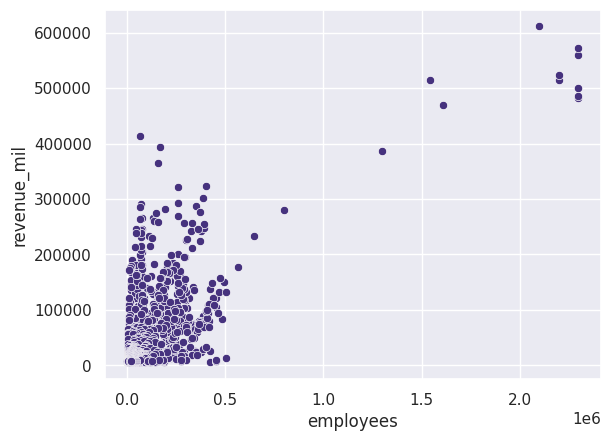

In [ ]:
sns.scatterplot(data=df_fortune, x='employees', y='revenue_mil')

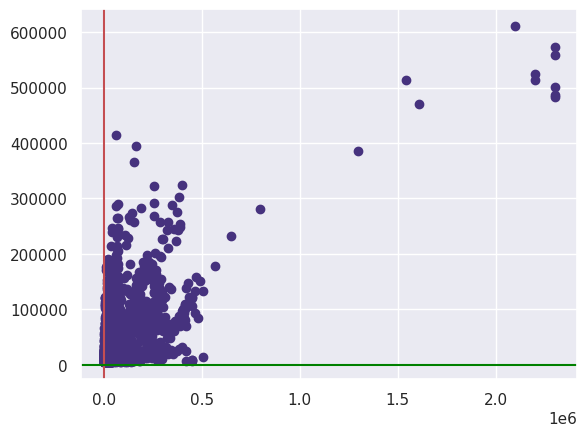

In [ ]:
# Plot
plt.plot( 'employees', 'revenue_mil', data=df_fortune, linestyle='none', marker='o')

# Annotation
plt.axvline(40, color='r')
plt.axhline(40, color='green')

# Show the graph
plt.show()

###Revenue_mil vs profit_mil

Text(0, 0.5, 'Revenue in USD millions')

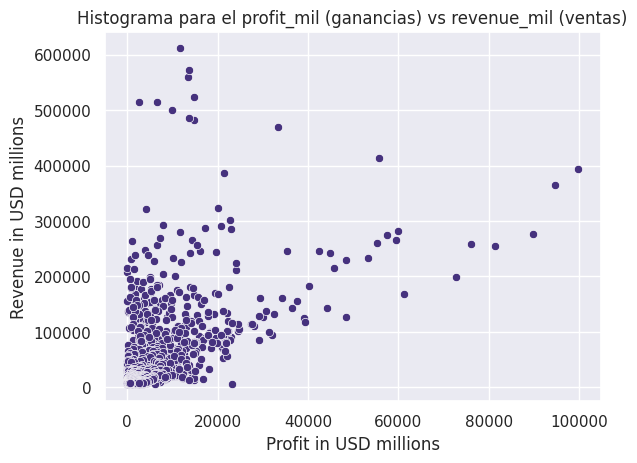

In [ ]:
sns.scatterplot(data=df_fortune, x='profit_mil', y='revenue_mil')
plt.title('Histograma para el profit_mil (ganancias) vs revenue_mil (ventas)')
plt.xlabel('Profit in USD millions')
plt.ylabel('Revenue in USD millions')

In [ ]:
df_fortune.groupby('profit_mil')['revenue_mil'].mean()

profit_mil
0.0          5988.000000
1.0          9123.000000
2.0          7997.500000
3.0          7980.500000
4.0         14616.666667
               ...      
76033.0    257637.000000
81417.0    254616.000000
89795.0    276094.000000
94680.0    365817.000000
99803.0    394328.000000
Name: revenue_mil, Length: 2447, dtype: float64

Empresas que tienen ganancias totales de cero pero su empresas tienen ventas desde 5988 millones y tenemos empresas que tienen ganancias totales de 99 mil millones y sus ventas son de casi 400 mil millones de dólares

### Revenue_mil vs Market_value_mil

Las empresas con ganancias menores de 100000 millones de USD valen menos de 500000 millones en el mercado

<Axes: xlabel='market_value_mil', ylabel='revenue_mil'>

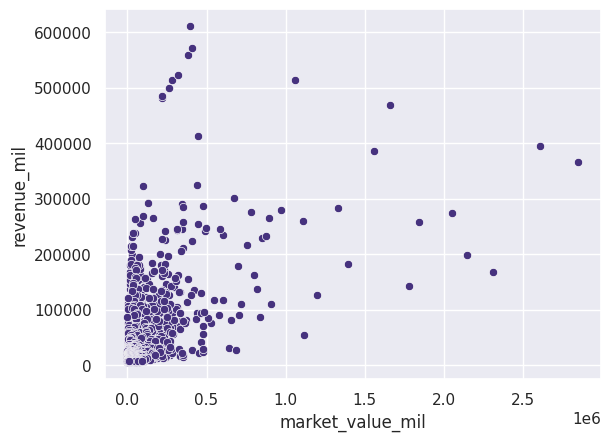

In [ ]:
sns.scatterplot(data=df_fortune, x='market_value_mil', y='revenue_mil')

Revenue_mil vs Asset_mil

El asset_mil mayor e igual a 4 no es muy confiable porque no tenemos representación al contar sus valores, pero si en el scatterplot, esto nos hace match con la matriz que hicimos antes y nos mostraba que asset no tiene mucha relaci+pm con ventas

In [ ]:
(df_fortune['asset_mil'].value_counts())

9132.0     3
5777.0     3
4431.0     2
5178.0     2
7837.0     2
          ..
10740.0    1
8015.0     1
4252.0     1
7726.0     1
13299.0    1
Name: asset_mil, Length: 3683, dtype: int64

<Axes: xlabel='asset_mil', ylabel='revenue_mil'>

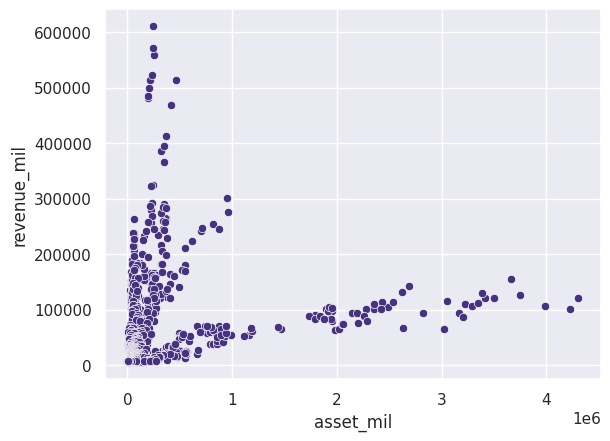

In [ ]:
sns.scatterplot(data=df_fortune, x='asset_mil', y='revenue_mil')

### Year vs Rank


<Axes: xlabel='year', ylabel='rank'>

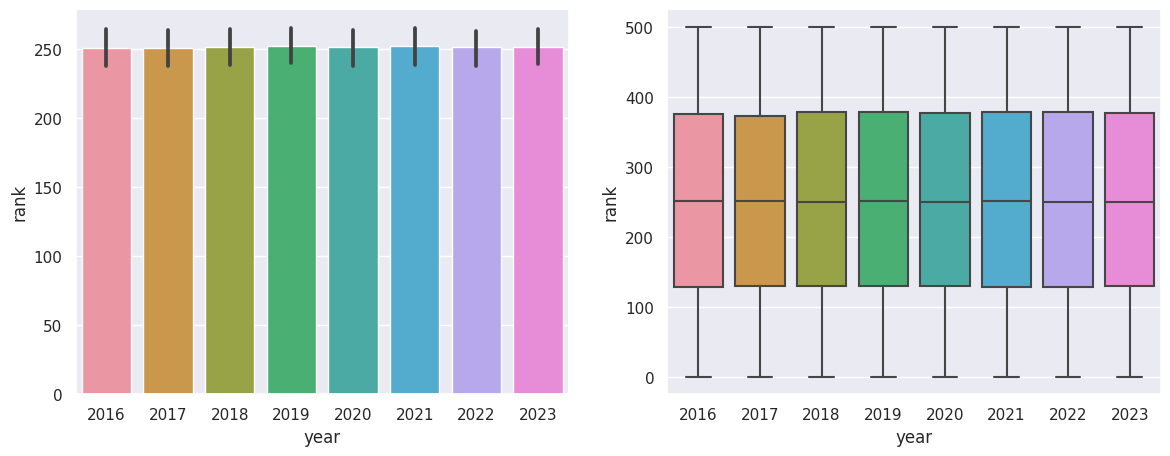

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (14,5))

sns.barplot(data=df_fortune, x='year', y='rank', ax=ax[0])
sns.boxplot(data=df_fortune, x='year', y='rank', ax=ax[1])

In [15]:
name_20 = df_fortune['name'].head(20)
df_fortune.groupby(name_20)['rank'].mean() #media/promedio #median=median()

name
American Financial Group, Inc.   NaN
.                                 NaN
1                                 NaN
3Com                              NaN
3Com Corporation                  NaN
                                   ..
morg                              NaN
priceline.com Incorporated        NaN
salesforce.com                    NaN
universal                         NaN
TruServ Corporation              NaN
Name: rank, Length: 2255, dtype: float64